In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')



# Data Preprocessing:

In [ ]:
#load the dataset and display the first rows of the dataset
data=pd.read_csv('/content/AB_NYC_2019 (1).csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.host_id.value_counts()

,count
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
...,...
11274802,1
76487242,1
76477851,1


In [ ]:
data.shape

(48895, 16)

In [ ]:
#gettig the idea of columns ad dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#checking for missing values
data.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
#drop name, host_name columns

data=data.drop(['id','name','last_review','host_name','host_id'],axis=1)
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
data[['number_of_reviews','reviews_per_month']]

,number_of_reviews,reviews_per_month
0,9,0.21
1,45,0.38
2,0,NaN
3,270,4.64
4,9,0.10
...,...,...
48890,0,NaN
48891,0,NaN
48892,0,NaN
48893,0,NaN


In [ ]:
#replace the missinh values of reviews per month with o
data.fillna({'reviews_per_month':0},inplace=True)


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#recheck again....
data.isnull().sum()


,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0


In [ ]:
data[(data['availability_365'] == 0)]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
14,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.22,1,0
20,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48550,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,0.00,1,0
48731,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,0.00,1,0
48756,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,0.00,1,0
48760,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,0.00,1,0


In [ ]:
df5= data[(data['availability_365'] == 0) & (data['reviews_per_month']  > 0)]
df5

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
14,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.22,1,0
20,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...
46532,Manhattan,Hell's Kitchen,40.76479,-73.98667,Private room,86,1,1,0.88,5,0
46583,Brooklyn,Bedford-Stuyvesant,40.68364,-73.92307,Entire home/apt,125,3,1,1.00,1,0
47175,Brooklyn,Bedford-Stuyvesant,40.68091,-73.95006,Entire home/apt,350,2,1,1.00,2,0
47218,Brooklyn,Bushwick,40.69640,-73.91898,Private room,10,1,2,2.00,1,0


In [ ]:
#drop rows  where availability is 0
df=data[data['availability_365']>0].copy()
df.shape

(31362, 11)

We dropped listings with availability_365 = 0 because they were not available for booking at all during the year. Including them would introduce noise, as their prices don’t reflect actual market behavior. Since they couldn't have been booked, they offer no useful signal for predicting prices and could mislead the model.

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000
mean,40.728401,-73.948745,162.050475,8.338658,31.852369,1.509593,10.334067,175.831994
std,0.056561,0.051397,254.425463,23.836703,51.636804,1.781266,40.700398,126.187636
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,40.688383,-73.983270,70.000000,2.000000,2.000000,0.170000,1.000000,55.000000
50%,40.723720,-73.954110,111.500000,3.000000,10.000000,0.920000,1.000000,168.000000
75%,40.763030,-73.930132,189.000000,5.000000,39.000000,2.340000,3.000000,305.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Exploratory Data Analysis**

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
       "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'East Harlem', 'Park Slope', 'Bedford-Stuyvesant',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Flatlands',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Ridgewood', 'Morningside Heights', 'Jamaica',
       'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', '

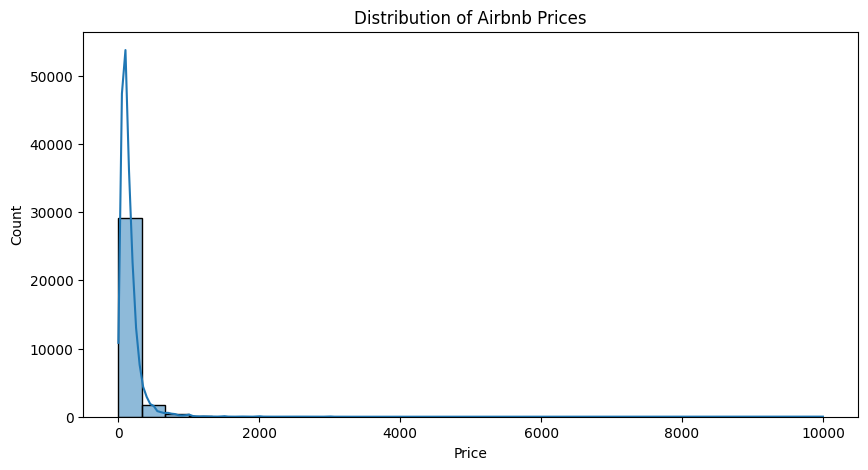

In [ ]:
#distribution of price

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


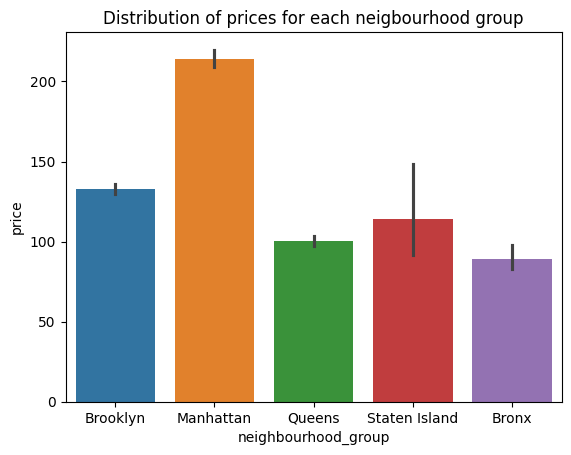

In [ ]:
#distribution of prices for each neigbourhood group
sns.barplot(x='neighbourhood_group',y='price',hue='neighbourhood_group',data=df)
plt.title('Distribution of prices for each neigbourhood group')
plt.show()


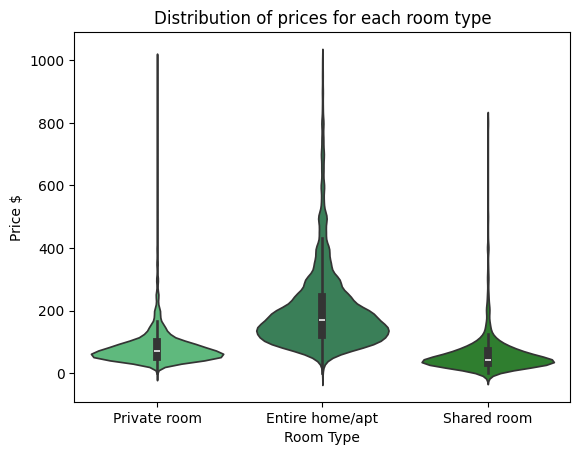

In [ ]:
#to check how room type and the prices vary is using violinplot....
green_palette = ['#50c878', '#2e8b57', '#228b22', '#98fb98', '#98ff98']

sns.violinplot(x='room_type',y='price',data=df[df['price']<1000],palette=green_palette)
plt.title('Distribution of prices for each room type')
plt.xlabel('Room Type')
plt.ylabel('Price $')
plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

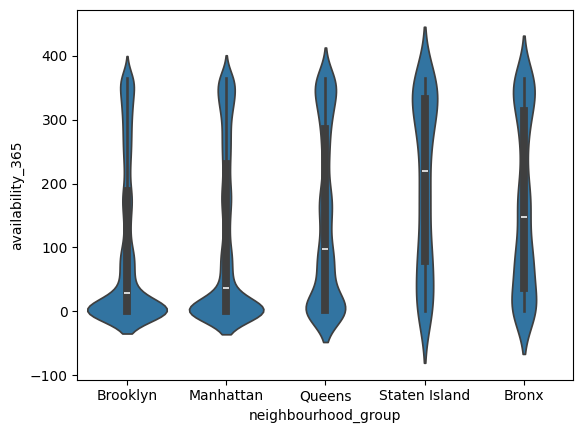

In [ ]:
#plot violin plot neigbourhood_group and availability_365
sns.violinplot(data=data,x='neighbourhood_group',y='availability_365')

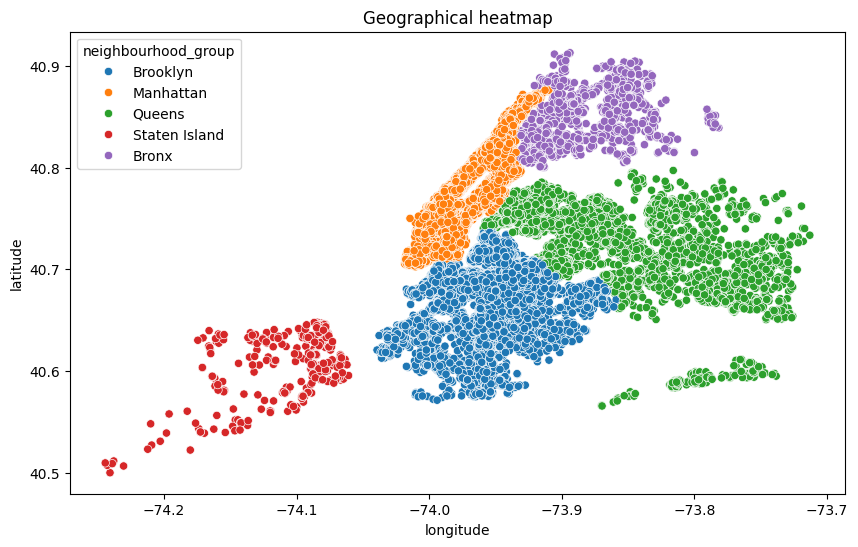

In [ ]:
#geographical heatmap(latitutude & longitutude)
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',hue='neighbourhood_group',data=data)
plt.title('Geographical heatmap')
plt.show()

In [ ]:
#view top neighbourhoods based on listing price
top_neighbourhoods=df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
top_neighbourhoods

,price
neighbourhood,
Fort Wadsworth,800.000000
Sea Gate,569.666667
Riverdale,567.250000
Tribeca,561.462810
Battery Park City,511.882353
Prince's Bay,484.333333
Flatiron District,381.571429
Randall Manor,336.000000
NoHo,331.490566


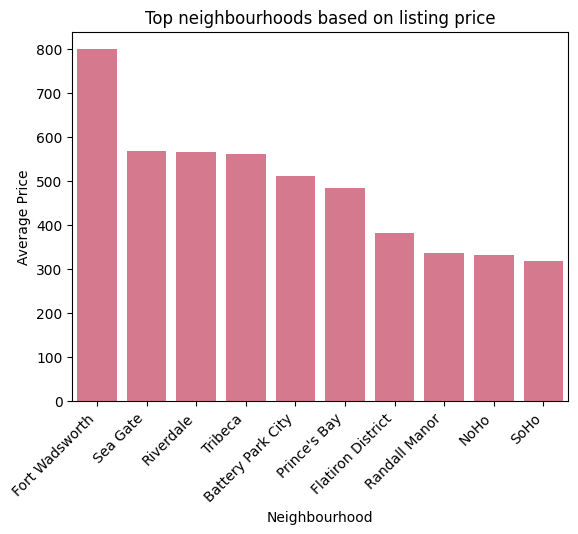

In [ ]:
# colors =Antique Mauve(#b090a8),Deep Blush(#e36a86), Dust Rose(#c97b9b), Mauve(#b784a7)
# brown_palette = ['#a9746e', '#bc8f8f', '#8b4513', '#954535', '#6f4e37']
# elegant_palette = ['#b35b84', '#bc8f8f', '#a9746e', '#8b4513', '#6f4e37']

#use barplot to visualize
sns.barplot(x=top_neighbourhoods.index,y=top_neighbourhoods.values, color='#e36a86')
plt.title('Top neighbourhoods based on listing price')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45°, align right
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# Count how many listings each neighbourhood has
neighbourhood_counts = df['neighbourhood'].value_counts()
neighbourhood_counts

,count
neighbourhood,
Bedford-Stuyvesant,2482
Williamsburg,2052
Harlem,1734
Bushwick,1449
Hell's Kitchen,1446
...,...
Silver Lake,1
Richmondtown,1
Fort Wadsworth,1


In [ ]:
#we try to pick only top 10 since we 218 neighbourhood in total..
neighbourhood_counts = df['neighbourhood'].value_counts()

top_neighbourhoods = neighbourhood_counts.nlargest(20)
top_neighbourhoods

,count
neighbourhood,
Bedford-Stuyvesant,2482
Williamsburg,2052
Harlem,1734
Bushwick,1449
Hell's Kitchen,1446
Upper East Side,1095
Upper West Side,1089
Midtown,1087
East Village,957


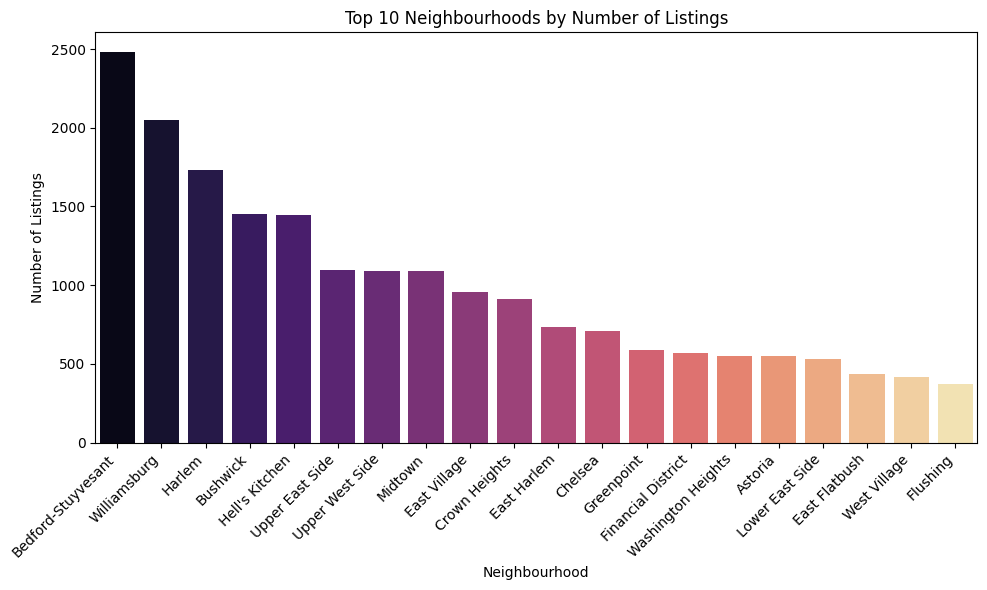

In [ ]:
#visualize the top 10 based on listing...
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette='magma')

plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Group by all neighbourhoods and get number of listig and average price....
neighbourhood_all = df.groupby('neighbourhood').agg(
    listing_count=('neighbourhood', 'count'),
    average_price=('price', 'mean')
).sort_values(by='listing_count', ascending=False)

neighbourhood_all

,listing_count,average_price
neighbourhood,,
Bedford-Stuyvesant,2482,115.168815
Williamsburg,2052,161.092593
Harlem,1734,129.643022
Bushwick,1449,91.282954
Hell's Kitchen,1446,213.183264
...,...,...
Fort Wadsworth,1,800.000000
Rossville,1,75.000000
Silver Lake,1,80.000000


In [ ]:
#classify and put all the top 10 neighbourhood in new_neighbourhood colum and label the rest as others
df['New_neighbourhood'] = df['neighbourhood'].apply(
    lambda x: x if x in top_neighbourhoods else 'Other')

df['New_neighbourhood']

,New_neighbourhood
0,Other
1,Midtown
2,Harlem
3,Other
5,Other
...,...
48890,Bedford-Stuyvesant
48891,Bushwick
48892,Harlem
48893,Hell's Kitchen


In [ ]:
# One-hot encode 'New_neighbourhood', 'neighbourhood_group', and 'room_type'
df1 = pd.get_dummies(df,
                     columns=['New_neighbourhood', 'neighbourhood_group', 'room_type'],
                     prefix=['neibour', 'group', 'room'],
                     drop_first=True, dtype=int)
df1.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neibour_Bedford-Stuyvesant,...,neibour_Upper West Side,neibour_Washington Heights,neibour_West Village,neibour_Williamsburg,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,room_Private room,room_Shared room
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,...,0,0,0,0,1,0,0,0,1,0
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,...,0,0,0,0,0,1,0,0,0,0
2,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,...,0,0,0,0,0,1,0,0,1,0
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,...,0,0,0,0,1,0,0,0,0,0
5,Murray Hill,40.74767,-73.97500,200,3,74,0.59,1,129,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#delete neighbourhood column from the dataframe
df2=df1.drop('neighbourhood',axis=1)
df2.tail()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neibour_Bedford-Stuyvesant,neibour_Bushwick,...,neibour_Upper West Side,neibour_Washington Heights,neibour_West Village,neibour_Williamsburg,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,room_Private room,room_Shared room
48890,40.67853,-73.94995,70,2,0,0.0,2,9,1,0,...,0,0,0,0,1,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,0.0,2,36,0,1,...,0,0,0,0,1,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,0.0,1,27,0,0,...,0,0,0,0,0,1,0,0,0,0
48893,40.75751,-73.99112,55,1,0,0.0,6,2,0,0,...,0,0,0,0,0,1,0,0,0,1
48894,40.76404,-73.98933,90,7,0,0.0,1,23,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#use range 40-1000 for price:
df_range = df2.copy()

# Filter out prices outside the range
df_range = df_range[(df_range['price'] >= 30) & (df_range['price'] <= 800)]

print(f"Remaining rows after range filter: {len(df_range)}")


Remaining rows after range filter: 30781


In [ ]:
#range minimum night = 1-90
df_mini_range = df_range.copy()

df_mini_range = df_mini_range[(df_mini_range['minimum_nights'] >= 1) & (df_mini_range['minimum_nights'] <= 30)]

print(f"Remaining rows after range filter: {len(df_mini_range)}")


Remaining rows after range filter: 30207


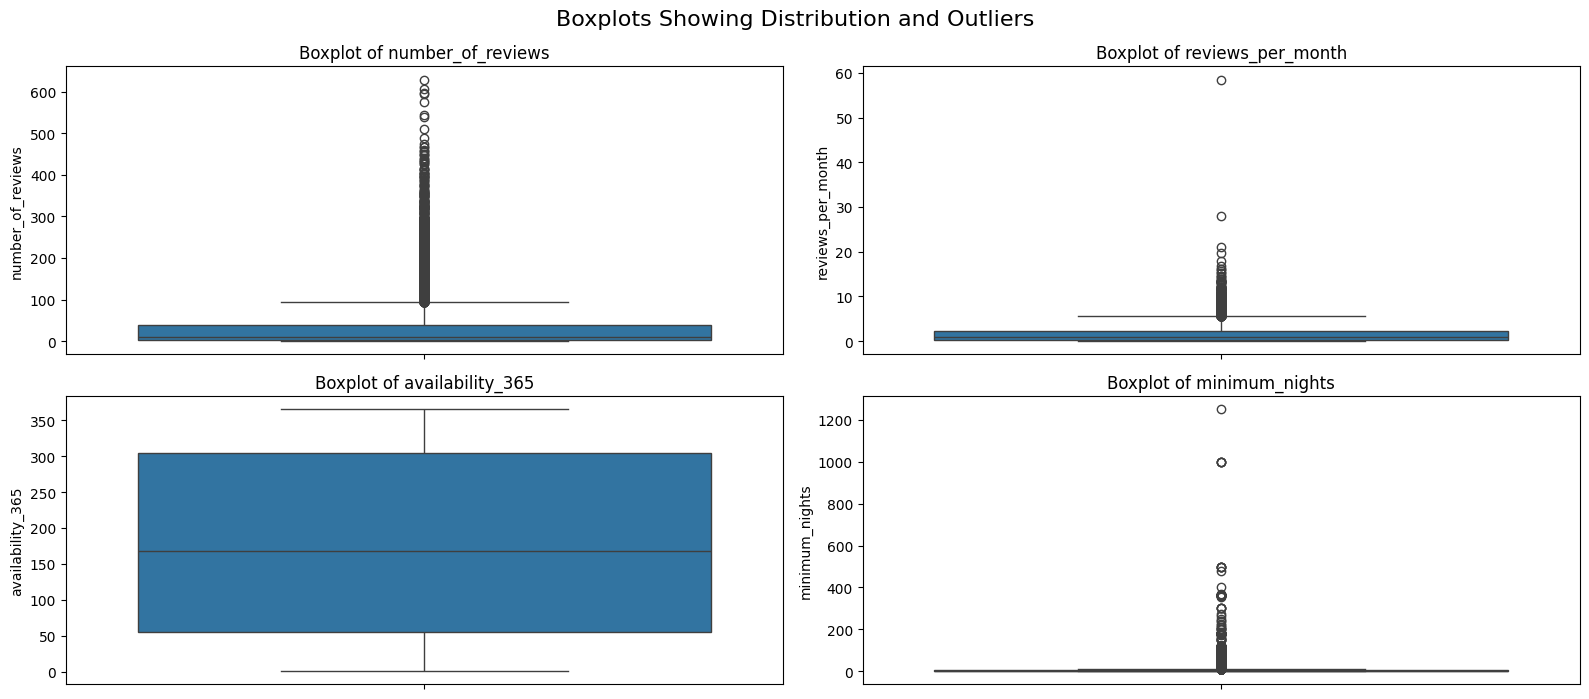

In [ ]:
#detect outliers from the remaining features:
features = ['number_of_reviews', 'reviews_per_month', 'availability_365','minimum_nights']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df1[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.suptitle('Boxplots Showing Distribution and Outliers', fontsize=16, y=1.02)
plt.show()


In [ ]:
#remove the outliers using the IQR method
df_cleaned = df_mini_range.copy()

# List of features to remove outliers from
features_to_remove= ['price','minimum_nights','number_of_reviews','reviews_per_month']

# IQR method for each feature
for feature in features_to_remove:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]

In [ ]:
df_cleaned.shape

(21437, 34)

In [ ]:
df_cleaned.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neibour_Bedford-Stuyvesant,neibour_Bushwick,...,neibour_Upper West Side,neibour_Washington Heights,neibour_West Village,neibour_Williamsburg,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,room_Private room,room_Shared room
count,21437.00000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.00000,...,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000,21437.000000
mean,40.72612,-73.944378,126.088912,2.704110,24.125717,1.419175,4.514298,158.764892,0.084667,0.05094,...,0.025237,0.020712,0.011662,0.069693,0.423893,0.373326,0.155386,0.012828,0.500397,0.026823
std,0.05953,0.053795,73.803040,1.810125,28.887023,1.338318,26.777856,125.380712,0.278392,0.21988,...,0.156847,0.142421,0.107362,0.254634,0.494185,0.483699,0.362280,0.112536,0.500012,0.161569
min,40.49979,-74.244420,30.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.68580,-73.979960,69.000000,1.000000,2.000000,0.300000,1.000000,42.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.71903,-73.950270,100.000000,2.000000,12.000000,1.000000,1.000000,132.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,40.76298,-73.925410,169.000000,3.000000,36.000000,2.230000,2.000000,281.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,40.91306,-73.712990,355.000000,11.000000,120.000000,5.490000,327.000000,365.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


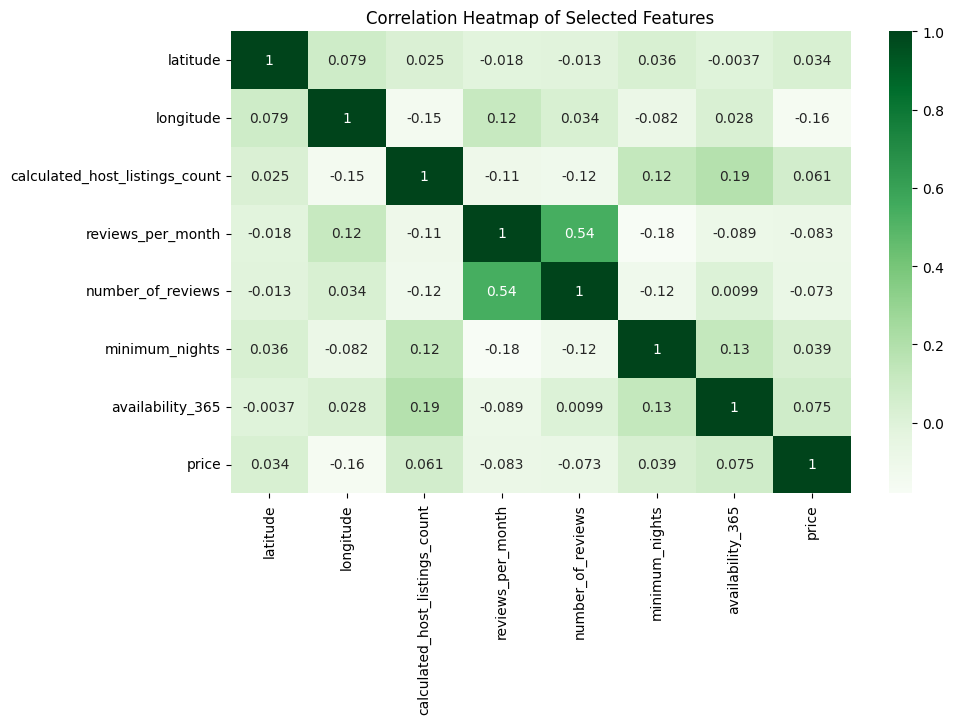

In [ ]:
#Heatmap tovisualize the correlation between the numerical features in df_Cleaned dataframe

selected_cols = ['latitude','longitude','calculated_host_listings_count','reviews_per_month','number_of_reviews','minimum_nights','availability_365','price']

df_selected = df1[selected_cols]

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='Greens')
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# **Modelling**

In [ ]:
#split the datathe data
from sklearn.model_selection import train_test_split

X=df_cleaned.drop('price',axis=1)
y=df_cleaned['price']

In [ ]:
df_cleaned.shape

(21437, 34)

In [ ]:
#training the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#scale the data

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Initialize and train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict on test set
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE : {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²  : {r2_lr:.2f}")

MAE : 37.13
RMSE: 51.20
R²  : 0.52


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 5-Fold Cross-validation for R² Score
cv_mae_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')
cv_rmse_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Display mean scores
print(f"Average MAE  : {-cv_mae_scores.mean():.2f}")  # Negative because sklearn returns negative MAE
print(f"Average RMSE : {np.sqrt(-cv_rmse_scores.mean()):.2f}")
print(f"Average R²   : {cv_r2_scores.mean():.2f}")


Average MAE  : 37.94
Average RMSE : 52.12
Average R²   : 0.50


In [ ]:
#ridge regression

# Initialize Ridge model (you can tune alpha later)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
# Predict
y_pred_ridge = ridge.predict(X_test_scaled)

In [ ]:
# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MAE : {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²  : {r2_ridge:.2f}")

MAE : 37.13
RMSE: 51.20
R²  : 0.52


In [ ]:
#LASSO

# Train Lasso model
lasso = Lasso(alpha=0.1)  # Again, try different alpha values like 0.1, 0.01
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
# Predict
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
# Evaluation
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MAE : {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²  : {r2_lasso:.2f}")

MAE : 37.14
RMSE: 51.21
R²  : 0.52


# Tree-Based Models

(a) Decision Tree Regressor,RandomForest Regressor,Gradient Boosting

In [ ]:
#random forest,decision tree,Gradient boosting

models=[
    ('Random Forest',RandomForestRegressor()),
    ('Decision Tree',DecisionTreeRegressor()),
    ('Gradient Boost',GradientBoostingRegressor())

]

#loop through models and evaluate
for name,model in models:
    model.fit(X_train_scaled,y_train)

    preds=model.predict(X_test_scaled)

    mae=mean_absolute_error(y_test,preds)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    r2=r2_score(y_test,preds)

    print(f"Model: {name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")


Model: Random Forest
MAE: 34.51
RMSE: 48.38
R2: 0.57
Model: Decision Tree
MAE: 46.90
RMSE: 67.94
R2: 0.16
Model: Gradient Boost
MAE: 35.00
RMSE: 48.69
R2: 0.57


In [ ]:
#lets try to use hyperparameter for decision tree :
param_grid_dt = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

grid_search_dt = GridSearchCV(
    estimator=dt1,
    param_grid=param_grid_dt,
    scoring='r2',
    verbose=1,
    cv=3,
    n_jobs=-1
)

grid_search_dt.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5]},
             scoring='r2', verbose=1)

In [ ]:
# Show best parameters
print("Best parameters:", grid_search_dt.best_params_)


Best parameters: {'max_depth': 5, 'min_samples_split': 2}


In [ ]:
final_dt = DecisionTreeRegressor(random_state=42,min_samples_split=2,max_depth=5)
final_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Predict
final_y_pred_dt = dt.predict(X_test_scaled)

In [ ]:
# Evaluate
final_mae_dt = mean_absolute_error(y_test, final_y_pred_dt)
final_rmse_dt = np.sqrt(mean_squared_error(y_test, final_y_pred_dt))
final_r2_dt = r2_score(y_test, final_y_pred_dt)

print(f"MAE : {final_mae_dt:.2f}")
print(f"RMSE: {final_rmse_dt:.2f}")
print(f"R²  : {final_r2_dt:.2f}")

MAE : 47.06
RMSE: 68.36
R²  : 0.15


In [ ]:
#hyperparameter tunning for random forest
rf = RandomForestRegressor(random_state=42)

param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],

}


In [ ]:
rs_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    n_iter=10,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model (this may take some time)
rs_rf.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
best_rf = rs_rf.best_estimator_
print("Best Parameters:", rs_rf.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [ ]:
# Predict
f_y_pred= best_rf.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, f_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, f_y_pred))
r2 = r2_score(y_test, f_y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

MAE  : 34.36
RMSE : 48.06
R²   : 0.58


**key insights**

Linear, Ridge, and Lasso models were okay but didn’t capture the patterns in the data very well.

Decision Tree gave the worst results. It overfitted and didn’t do well on new data.

Random Forest gave the best results. It made the most accurate predictions and handled the data better than the rest.